<a href="https://colab.research.google.com/github/alexbonella/Tensorflow2/blob/master/Animals_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import cv2
import os
from tqdm import tqdm



print(tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
type(train_images[0])

numpy.ndarray

# Cargamos archivos desde local

In [0]:

# Cargamos archivos a Colab 

#from google.colab import files
#uploaded = files.upload()

In [7]:
!ls

data  data_animales.zip  sample_data


# Descompresion de nuestro dataset 

In [0]:
#data = zipfile.ZipFile(io.BytesIO(uploaded['data_animales.zip']),'r')
#data.extractall()

In [9]:
!ls  # Verificamos el proceso

data  data_animales.zip  sample_data


# Lectura de imagenes

In [0]:
especie=['gato','gorila','perro']

# Imagenes para entrenamiento

Para este dataset de entranamiento tenemos imagenes de gatos , perros y gorilas distribuidos de la siguiente manera :

1. **Gato :** 456 imagenes
2. **Gorila :** 19 imagenes
3. **Perro :** 524 imagenes


In [0]:
Largo=200
Altura=200

In [12]:
train_img=[]
train_tag=[]

for animal in tqdm(range(len(especie))):

  for i in os.listdir('data/entrenamiento/'+especie[animal]):
   
    if (especie[animal]=='gato'):
      train_tag.append(0)
    elif (especie[animal]=='gorila'):
      train_tag.append(1)
    else:
      train_tag.append(2)

    img=cv2.imread('data/entrenamiento/'+especie[animal]+'/'+i)
    train_img.append(cv2.resize(img,(Largo,Altura)))
  

  

100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


# Imagenes para validacion

Para este dataset de validación tenemos imagenes de gatos , perros y gorilas en diferentes posiciones y algunos con personas  distribuidos de la siguiente manera :

1. **Gato :** 1012 imagenes
2. **Gorila :** 20 imagenes
3. **Perro :** 1013 imagenes

In [13]:
test_img=[]
test_tag=[]

for animal in tqdm(range(len(especie))):

  for i in os.listdir('data/validacion/'+especie[animal]):
    
    try : 
      img_val=cv2.imread('data/validacion/'+especie[animal]+'/'+i)
      test_img.append(cv2.resize(img_val,(Largo,Altura)))
      if (especie[animal]=='gato'):
        test_tag.append(0)
      elif (especie[animal]=='gorila'):
        test_tag.append(1)
      else:
        test_tag.append(2)
    except:
      pass

100%|██████████| 3/3 [00:05<00:00,  2.43s/it]


In [14]:
len(test_img)

2043

In [15]:
len(test_tag)

2043

In [16]:
test_img[990].shape

(200, 200, 3)

In [17]:
len(train_img)  # 999 imagenes para entrenamiento

999

In [18]:
len(test_img)  # 2045 imagenes para entrenamiento

2043

# Visualización de imagenes

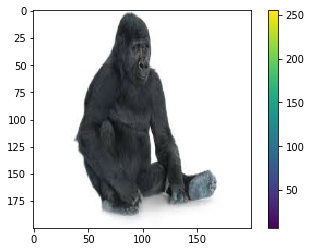

In [19]:
plt.figure()
plt.imshow(train_img[460])
plt.colorbar()
plt.grid(False)
plt.show()

# Verificamos el etiquetado

Imprimimos 24 imagenes de prueba para verificar si el etiquetado es correcto.

In [0]:
class_names = ['Gato', 'Gorila', 'Perro']

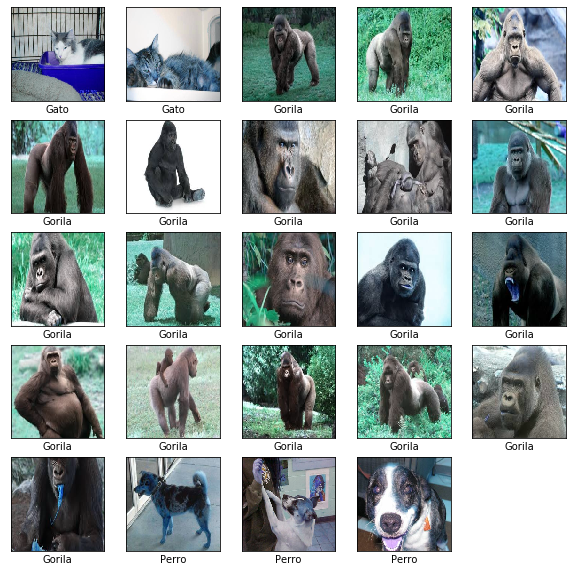

In [21]:
plt.figure(figsize=(10,10))
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[454+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_tag[454+i]])
plt.show()

In [22]:
len(train_img) 

999

In [23]:
len(test_img)

2043

# Convertimos a array nuestras imagenes

In [0]:
train_images=np.asarray(train_img)
test_images=np.asarray(test_img)

In [25]:
print(train_images.shape)
print('\n')
print(test_images.shape)

(999, 200, 200, 3)


(2043, 200, 200, 3)


# Arquitectura de nuestra red neuronal

Para este ejemplo vamos a usar la arquitectura **ALexNet** 

![texto alternativo](https://engmrk.com/wp-content/uploads/2018/10/AlexNet_Original_Image.jpg)

# Summary de la arquitectura  AlexNet 

Como podemos observar debemos procesar nuestras imagenes para que cumplan con las dimensiones de nuestra capa de entrada ***(227,227,3)***

![texto alternativo](https://engmrk.com/wp-content/uploads/2018/10/AlexNet_Summary_Table.jpg)

# Normalizamos imagenes

Normalización de nuestro dataset
A continuación dividimos nuestras imagenes por 255 para obtener valores entre 0 y 1


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_tag = np.array(train_tag)
test_tag = np.array(test_tag)

# Creación de nuestro modelo

In [0]:

model = keras.Sequential([
    
    # CONV1 Y MAX-POOLING1
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(Largo,Altura,3), padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # CONV2 Y MAX-POOLING2
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # Aplanar, FC1, FC2 y salida
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [0]:
## Variación Modelo AlexNet 


#model = keras.Sequential([
    
    # CONV1 Y MAX-POOLING1
#    keras.layers.Conv2D(filters=96,kernel_size=(11,11), activation='relu', input_shape=(227,227,3), strides=(4,4), padding='valid'),
#    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    # CONV2 Y MAX-POOLING2
    
#    keras.layers.Conv2D(filters=256,kernel_size=(5,5), activation='relu', strides=(1,1), padding='valid'),
#    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    # CONV3 
    
#    keras.layers.Conv2D(filters=384,kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'),
    
    # CONV4 
    
#    keras.layers.Conv2D(filters=384,kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'),
    
    # CONV5 
    
#    keras.layers.Conv2D(filters=256,kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'),
#    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    

    # Aplanamos
#    keras.layers.Flatten(),
    
    # FC1
    
#    keras.layers.Dense(512, activation='relu'),
#    keras.layers.Dropout(0.4),
    
    # FC2
    
#    keras.layers.Dense(256, activation='relu'),
#    keras.layers.Dropout(0.4),
    
    # FC3
#    keras.layers.Dense(120, activation='relu'),
#    keras.layers.Dropout(0.4),
    
    # Salida 
#    keras.layers.Dense(3, activation='softmax')
#])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               40960256  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

# Compilamos el modelo

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos nuestro modelo

In [32]:
model.fit(train_images, train_tag, epochs=20,batch_size=64,verbose=1)

Train on 999 samples
Epoch 1/20
999/999 [==============================] - 44s 44ms/sample - loss: 0.8841 - accuracy: 0.4825
Epoch 2/20
999/999 [==============================] - 43s 43ms/sample - loss: 0.7841 - accuracy: 0.5255
Epoch 3/20
999/999 [==============================] - 43s 43ms/sample - loss: 0.7830 - accuracy: 0.5255
Epoch 4/20
999/999 [==============================] - 43s 43ms/sample - loss: 0.7720 - accuracy: 0.5405
Epoch 5/20
999/999 [==============================] - 43s 43ms/sample - loss: 0.7700 - accuracy: 0.5345
Epoch 6/20
999/999 [==============================] - 43s 43ms/sample - loss: 0.7700 - accuracy: 0.5375
Epoch 7/20
999/999 [==============================] - 43s 43ms/sample - loss: 0.7618 - accuracy: 0.5495
Epoch 8/20
999/999 [==============================] - 44s 44ms/sample - loss: 0.7561 - accuracy: 0.5656
Epoch 9/20
999/999 [==============================] - 44s 44ms/sample - loss: 0.7412 - accuracy: 0.6006
Epoch 10/20
999/999 [======================

# Desempeño del modelo

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_tag, verbose=2)

print('\nTest accuracy:', test_acc)

2043/2043 - 28s - loss: 0.7100 - accuracy: 0.5874

Test accuracy: 0.5873715


**NOTA :** Como podemos observar nuestro modelo no logra clasificar de la mejor forma , entonces el siguiente paso es mejorar el modelo

# Predicciones del modelo

In [0]:
predictions = model.predict(test_images)

In [38]:
np.argmax(predictions[4])

0

In [39]:
test_tag[4]

0

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

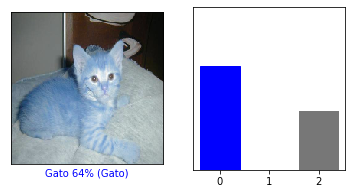

In [51]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_tag, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_tag)
plt.show()